<a href="https://colab.research.google.com/github/Aldistwn29/Natural_language_processing/blob/main/Analisis_sentimen_sirekap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('ulasan_sirekap.csv')

In [ ]:
# menyelesi kolom yg di gunkan yaitu tweet, username dan waktu
df = df[['full_text', 'username', 'created_at']]
df

,full_text,username,created_at
0,Ini data Real Count TimNas AMIN dengan data C1...,AbdulRachimmks,Thu Feb 15 22:56:18 +0000 2024
1,KPU dikabarkan menunda penghitungan dan rekapi...,AbdulRachimmks,Sun Feb 18 14:46:20 +0000 2024
2,ABRAKADABRA! REAL COUNT KPU PSI MASUK 10 BESAR...,herculep638,Tue Feb 27 08:23:22 +0000 2024
3,Sirekap gimana kelanjutannya .. di kalahkan su...,alfatih212426,Fri May 24 08:16:44 +0000 2024
4,enteng banget jawab nya! Komisioner @KPU_ID Id...,BSbukit,Sat Feb 24 02:44:49 +0000 2024
...,...,...,...
2078,KPU Nyatakan Kesalahan Input Data Hasil Pemilu...,jawapos,Tue Feb 20 01:13:22 +0000 2024
2079,JAKARTA https://t.co/Z6m4QUAnwD Sistem rekapit...,Kedaipetualang,Wed Feb 21 00:19:52 +0000 2024
2080,Sekjen PDIP Hasto Kristiyanto menilai Sirekap ...,SINDOnews,Tue Mar 19 12:10:00 +0000 2024
2081,[FORUM AKADEMIKA] Perbedaan perhitungan perole...,LPMaspirasi,Tue Mar 19 06:12:32 +0000 2024


# **1. Celaning Data**

In [ ]:
print(f'shape: {df.shape}')

shape: (2083, 3)


In [ ]:
# menghapus duplikat
df = df.drop_duplicates(subset=['full_text'])

In [ ]:
print(f'jumlah data duplikat : {df.duplicated().sum()}')

jumlah data duplikat : 0


In [ ]:
df = df.dropna()

In [ ]:
print(f'data missing value : {df.isnull().sum()}')

data missing value : full_text     0
username      0
created_at    0
dtype: int64


In [ ]:
print(f'shape: {df.shape}')

shape: (352, 3)


In [ ]:
import re

def clean_tweet_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', ' ', text)  # Menghapus username
    text = re.sub(r'#[A-Za-z0-9]+', ' ', text)  # Menghapus hashtag
    text = re.sub(r'http\S+', ' ', text)        # Menghapus URL
    text = re.sub(r'\d+', ' ', text)            # Menghapus angka
    text = re.sub(r'[-()\"#/@;:<>{}\'\[\]=~|.!?,_]', ' ', text)  # Menghapus karakter khusus
    text = text.strip()                         # Menghapus spasi ekstra di awal dan akhir
    return text
df['full_text'] = df['full_text'].apply(clean_tweet_text)

In [ ]:
# mengubah huruf besar ke kecil
df['full_text'] = df['full_text'].str.lower()

In [ ]:
df.head()

,full_text,username,created_at
0,iini data rel count timns min dengn data c ...,AbdulRachimmks,Thu Feb 15 22:56:18 +0000 2024
1,kpu dikbrkn menunda penghitungn dn rekpitulsi ...,AbdulRachimmks,Sun Feb 18 14:46:20 +0000 2024
2,hsil rel count kpu psi msuk besr berkt sir...,herculep638,Tue Feb 27 08:23:22 +0000 2024
3,sirekp bgimn kelnjutnnyang di klhkn serveyv...,alfatih212426,Fri May 24 08:16:44 +0000 2024
4,enteng bnget jwb nyang komisioner Indonesi ...,BSbukit,Sat Feb 24 02:44:49 +0000 2024


# 2. Preprosesing




*   Normalisasi
*   Stopword
*   Tokenazing
*   Stemming



In [ ]:
# normalisasi
# di lakukan secara manual
norm = {"gimana": "bagaimana","bgt" : "banget","kyk" : "seperti","bgt" : "banget", "uset":"kaget", "y":"ya", "yg":"yang", "curang":"kecurangan",
        "gue" : "saya","lu" :"kamu" , "menyukai" :"suka", "memperlakukan" : "perlakukan","bermain-main" : "bermain" ,"wkwk" : "ketawa",
        "nagco":"anomali", " trutama": "terutama", "pny" : "penyebab", "rb" : "ribu", "abrakadabra" : "hasil", "gobloknya":"kecurangan","tpdi":"tapi",
        "&":"dan", "dijembrengin":"anomali", "spt":"sempat","budget":"anggara", "under":"di bawah", "%" : " ", "nyaaatakan":"menyatakan", "sy" : "saya",
        "utk":"untuk", "surepay" : "survey", "anjing anjing" : "kesal", "&" :"dan", "id" : "Indonesia", "pepesan" : "omongan", "dg" : "dengan", "ngotot" : "tidak mau kalah",
        "amp" : "sampai", "stlh" : "setelah", "dgn" : "dengan", "yg" : "yang", 'hrs' : 'harus', 'bkn' : 'bukan', 'sdh' : 'sudah', 'tsb' : 'tersebut', 'dkk' : 'dan kawan kawan',
        'pd' : 'pada ', 'mergikan' : 'merugikan', 'penungutan' : 'pemungutan', ' saia' : 'saya', 'bwang' : 'bawa', 'diitung' : 'dihitung', 'soale ya' : 'soalnya', ' surve ': 'survey',
        'serent' : 'serentak', 'lah uset' : 'kaget', 'ni' : 'ini ', 'y' : 'yang', 'het' : 'hebat', 'sbelom' : 'sebelum ', 'amp' : 'sampai', 'mampos' : 'kesal',
        'thx': '', 'var':'','offside':'','gol':'','a':'','wasit':'','x':'','+':'','setan gundul':'','junimart girsang':'', 'iini':'ini', 'dt':'data','vlIndonesi':'indoneisa','yngh':'yang',
        'kwn':'kawan','syng':'sayang','pgi':'pagi', ' yngo':'yang', 'kit':'kita','pntu':'pantau','keslhn':'kesalahan','yngng':'yang', 'fktor':'','li':'','merupkn':'merupakan',' kesengjn':'kesengajaan', 'menjg':'menjadi', ' lgorithm':'algorithma',
        'menund':'menunda','sur':'servey', 'kecmtn':'kecamatan', 'sekmuruh':'seluruh',' lsnnyng':'langsung', ' dlh':'', 'kren':'karena', 'menglm':'mengalami',
        'kendl':'kendala','pembcn':'pembacaan','bkl ': 'bakalan'
}

In [ ]:
def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

,full_text,username,created_at
0,iini data rel count timns min dengn data c ...,AbdulRachimmks,Thu Feb 15 22:56:18 +0000 2024
1,kpu dikbrkn menunda penghitungn dn rekpitulsi ...,AbdulRachimmks,Sun Feb 18 14:46:20 +0000 2024
2,hsil rel count kpu psi msuk besr berkt sir...,herculep638,Tue Feb 27 08:23:22 +0000 2024
3,sirekp bgimn kelnjutnnyang di klhkn serveyn...,alfatih212426,Fri May 24 08:16:44 +0000 2024
4,enteng bnget jwb nyang komisioner Indonesi ...,BSbukit,Sat Feb 24 02:44:49 +0000 2024
...,...,...,...
443,kpu nyangtkn kesalahan input data hsil pemikmu...,jawapos,Tue Feb 20 01:13:22 +0000 2024
444,jkrt sistem rekpitulsi serveyng sirekp tIn...,Kedaipetualang,Wed Feb 21 00:19:52 +0000 2024
445,sekjen pd ip hsto kristiyangnto meini sir...,SINDOnews,Tue Mar 19 12:10:00 +0000 2024
446,forum kdemik peribuedn perhitungn perolehn se...,LPMaspirasi,Tue Mar 19 06:12:32 +0000 2024


In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.7 MB/s eta 0:00:00


In [ ]:
# stopword
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ['tidak']

stop_word = StopWordRemoverFactory().get_stop_words()
stop_word.extend(more_stop_words)

new_array = ArrayDictionary(stop_word)
stop_words_romover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_romover_new.remove(str_text)
  return str_text


df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df.head()

,full_text,username,created_at
0,iini data rel count timns min dengn data c ...,AbdulRachimmks,Thu Feb 15 22:56:18 +0000 2024
1,kpu dikbrkn menunda penghitungn dn rekpitulsi ...,AbdulRachimmks,Sun Feb 18 14:46:20 +0000 2024
2,hsil rel count kpu psi msuk besr berkt sir...,herculep638,Tue Feb 27 08:23:22 +0000 2024
3,sirekp bgimn kelnjutnnyang klhkn serveyngve...,alfatih212426,Fri May 24 08:16:44 +0000 2024
4,enteng bnget jwb nyang komisioner Indonesi ...,BSbukit,Sat Feb 24 02:44:49 +0000 2024


In [ ]:
# tokenize
tokenized = df['full_text'].apply(lambda x:x.split())
tokenized

0      [iini, data, rel, count, timns, min, dengn, da...
1      [kpu, dikbrkn, menunda, penghitungn, dn, rekpi...
2      [hsil, rel, count, kpu, psi, msuk, besr, berkt...
3      [sirekp, bgimn, kelnjutnnyang, klhkn, serveyng...
4      [enteng, bnget, jwb, nyang, komisioner, Indone...
                             ...                        
443    [kpu, nyangtkn, kesalahan, input, data, hsil, ...
444    [jkrt, sistem, rekpitulsi, serveyng, sirekp, t...
445    [sekjen, pd, ip, hsto, kristiyangnto, meini, s...
446    [forum, kdemik, peribuedn, perhitungn, peroleh...
447    [pemikmu, membenhi, sirekp, kpu, kesalahan, te...
Name: full_text, Length: 352, dtype: object

In [ ]:
# Steaming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)
tokenized.to_csv("preprosesing_sirekap_stemming.csv", index=False)

iini data rel count timns min dengn data c indoneis yangh kawan kawan sayangngng screenshot pukul pagi hri jumt feb yango pantau terus web kpu tetp semngt deteksi salah input sirekp yangng merupakankesengajaan menjdilgorithm
kpu dikbrkn tunda penghitungn dn rekpitulsi serveyng tingkt camat seluruh indonesi informsi yangng beredr lsnnyang sistem sirekp mengalamiii kendala baca data dimn rekpitulsi bklndilkukn kemb pd sels februri
hsil rel count kpu psi msuk besr berkt sirekp tk tyangng beberp hri
sirekp bgimn kelnjutnnyang klhkn serveyngveyang dn kekecurngnn tsm rezim bonek stu putrn sesui rhn ogrki
enteng bnget jwb nyang komisioner indonesi indonesim khk menyangtkn tindonesik kurtnyang baca formur c hsil plno pksi sirekp lntrn kuts kmer smrtphone nggot kpps g kesn orng iini
psien sayangngng cit jdi nggot kpps kerj mu jm pagi les besoknyang jm pagi dpt gji sehri jut cit setip msukkin data sirekp slh terus khirnyang merek diserveynguh kirim data bentuk pd f sj kekmurhn serveyngt serveyng

#  **3. Translate**

In [ ]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 985.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=ec1f3787c47743a4102f6f63e15c42d10147ede895b9113ee93103bdbaed64fb
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling 

In [ ]:
data = pd.read_csv('preprosesing_sirekap_stemming.csv')
data.head()

,full_text
0,iini data rel count timns min dengn data c ind...
1,kpu dikbrkn tunda penghitungn dn rekpitulsi se...
2,hsil rel count kpu psi msuk besr berkt sirekp ...
3,sirekp bgimn kelnjutnnyang klhkn serveyngveyan...
4,enteng bnget jwb nyang komisioner indonesi ind...


In [ ]:
from googletrans import Translator
translator = Translator()
data['text_eng'] = data['full_text'].apply(lambda x: translator.translate(x, dest='en').text)

In [ ]:
data.to_csv('Terjemahan_dataset_sirekap.csv', index=False)

# 4.  Labeling

In [115]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [116]:
data = pd.read_csv('Terjemahan_dataset_sirekap.csv')
data

,full_text,text_eng,klasifikasi
0,iini data rel count timns min dengn data c ind...,"This is the rel data for the team count, min w...",Negatif
1,kpu dikbrkn tunda penghitungn dn rekpitulsi se...,"The KPU was stopped, postponing the calculatio...",Positif
2,hsil rel count kpu psi msuk besr berkt sirekp ...,KPU PSI's real count results came in big thank...,Positif
3,sirekp bgimn kelnjutnnyang klhkn serveyngveyan...,sirekp how to continue that klahkn serveyngvey...,Netral
4,enteng bnget jwb nyang komisioner indonesi ind...,It's really easy to answer that the Indonesian...,Positif
...,...,...,...
347,kpu nyangtkn salah input data hsil mik pd sire...,I think it's wrong to input the data of the mi...,Negatif
348,jkrt sistem rekpitulsi serveyng sirekp tindone...,jkrt recapitulation system serving sirekap tin...,Positif
349,sekjen pd ip hsto kristiyangnto meini sirekp r...,secretary general at ip hsto kristiyangnto mei...,Positif
350,forum kdemik peribuedn perhitungn perolehn ser...,forum kdemic peribuedn calculation of server a...,Positif


In [117]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [118]:
data_tweet = list(data['text_eng'])
polaritas = 0

status = []

total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet ):
  analysis = TextBlob(tweet)
  polaritas += analysis.polarity

  if analysis.sentiment.polarity > 0.0:
      total_positif += 1
      status.append('Positif')
  else:
      total_negatif += 1
      status.append('Negatif')

  total +=1


print(f'Hasil Analisis\n total positif :{total_positif}\n total negatif: {total_negatif}')
print(f'total Data : {total}')

Hasil Analisis
 total positif :121
 total negatif: 231
total Data : 352


In [119]:
data['klasifikasi'] = status
data

,full_text,text_eng,klasifikasi
0,iini data rel count timns min dengn data c ind...,"This is the rel data for the team count, min w...",Negatif
1,kpu dikbrkn tunda penghitungn dn rekpitulsi se...,"The KPU was stopped, postponing the calculatio...",Positif
2,hsil rel count kpu psi msuk besr berkt sirekp ...,KPU PSI's real count results came in big thank...,Positif
3,sirekp bgimn kelnjutnnyang klhkn serveyngveyan...,sirekp how to continue that klahkn serveyngvey...,Negatif
4,enteng bnget jwb nyang komisioner indonesi ind...,It's really easy to answer that the Indonesian...,Positif
...,...,...,...
347,kpu nyangtkn salah input data hsil mik pd sire...,I think it's wrong to input the data of the mi...,Negatif
348,jkrt sistem rekpitulsi serveyng sirekp tindone...,jkrt recapitulation system serving sirekap tin...,Positif
349,sekjen pd ip hsto kristiyangnto meini sirekp r...,secretary general at ip hsto kristiyangnto mei...,Positif
350,forum kdemik peribuedn perhitungn perolehn ser...,forum kdemic peribuedn calculation of server a...,Positif


# 5. Visualisasi

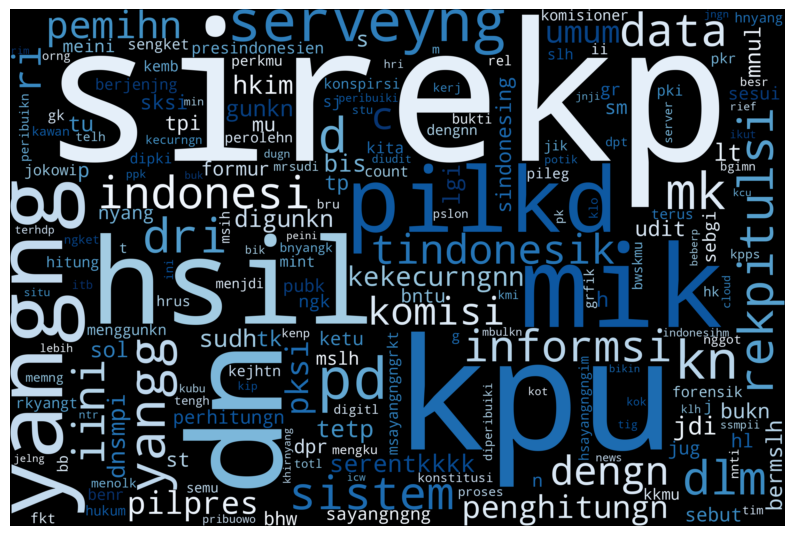

In [120]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(worldcloud):
  plt.figure(figsize=(10, 10))
  plt.imshow(worldcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

all_words = ' '.join([tweet for tweet in data['full_text']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS,
).generate(all_words)

plot_cloud(wordcloud)

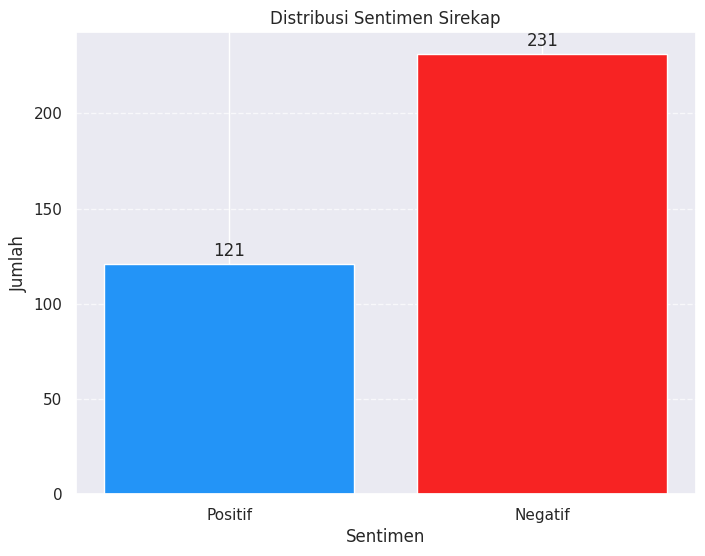

In [121]:
import seaborn as sns
sns.set_theme()
labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_char(labels, counts, title):
  fig, ax = plt.subplots(figsize=(8, 6))
  bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

  for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0,3),
                textcoords="offset points",
                ha='center', va='bottom')

  ax.grid(axis='y', linestyle='--', alpha=0.7)

  ax.set_xlabel('Sentimen')
  ax.set_ylabel('Jumlah')
  ax.set_title(title)

  plt.show()

show_bar_char(labels, counts, "Distribusi Sentimen Sirekap")

# 6. Klasifikasi Sentimen

In [122]:
data

,full_text,text_eng,klasifikasi
0,iini data rel count timns min dengn data c ind...,"This is the rel data for the team count, min w...",Negatif
1,kpu dikbrkn tunda penghitungn dn rekpitulsi se...,"The KPU was stopped, postponing the calculatio...",Positif
2,hsil rel count kpu psi msuk besr berkt sirekp ...,KPU PSI's real count results came in big thank...,Positif
3,sirekp bgimn kelnjutnnyang klhkn serveyngveyan...,sirekp how to continue that klahkn serveyngvey...,Negatif
4,enteng bnget jwb nyang komisioner indonesi ind...,It's really easy to answer that the Indonesian...,Positif
...,...,...,...
347,kpu nyangtkn salah input data hsil mik pd sire...,I think it's wrong to input the data of the mi...,Negatif
348,jkrt sistem rekpitulsi serveyng sirekp tindone...,jkrt recapitulation system serving sirekap tin...,Positif
349,sekjen pd ip hsto kristiyangnto meini sirekp r...,secretary general at ip hsto kristiyangnto mei...,Positif
350,forum kdemik peribuedn perhitungn perolehn ser...,forum kdemic peribuedn calculation of server a...,Positif


In [123]:
dataset = data.drop(['full_text'], axis=1, inplace=False)
dataset =[tuple(x) for x in dataset.to_records(index=False)]

In [125]:
import random

set_positif = []
set_negatif = []


for n in dataset:
  if(n[1] == 'Positif'):
      set_positif.append(n)
  else:
      set_negatif.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))

train = set_positif + set_negatif

train_set = []
for n in train:
  train_set.append(n)

In [126]:
from textblob.classifiers import NaiveBayesClassifier
model = NaiveBayesClassifier(train_set)
print(f'Nilai Acurasi : {model.accuracy(dataset)}')

Nilai Acurasi : 0.8409090909090909


In [127]:
# labeling
data_tweet = list(data['text_eng'])
polaritas = 0

status = []
total_positif = total_negatif  = total = 0

for i, tweet in enumerate(data_tweet):
  analysis = TextBlob(tweet, classifier=model)


  if analysis.classify() == 'Positif':
      total_positif += 1
  else :
      total_negatif += 1

  status.append(analysis.classify())
  total +=1

print(f'Hasil Analisis\n total positif :{total_positif}\n total negatif: {total_negatif}')
print(f'total Data : {total}')

Hasil Analisis
 total positif :85
 total negatif: 267
total Data : 352


In [128]:
status = pd.DataFrame({"Kalsifikasi Bayes": status})
data["Klasifikasi Bayes"] = status

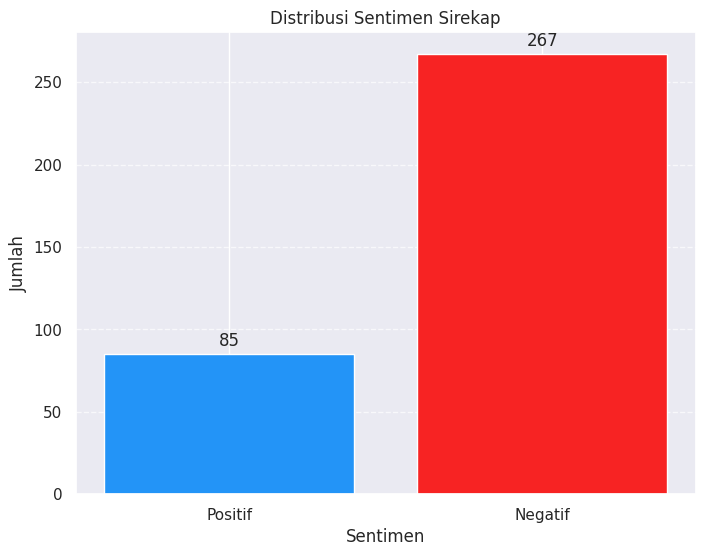

In [129]:
import seaborn as sns
sns.set_theme()
labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_char(labels, counts, title):
  fig, ax = plt.subplots(figsize=(8, 6))
  bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

  for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0,3),
                textcoords="offset points",
                ha='center', va='bottom')

  ax.grid(axis='y', linestyle='--', alpha=0.7)

  ax.set_xlabel('Sentimen')
  ax.set_ylabel('Jumlah')
  ax.set_title(title)

  plt.show()

show_bar_char(labels, counts, "Distribusi Sentimen Sirekap")

In [130]:
data

,full_text,text_eng,klasifikasi,Klasifikasi Bayes
0,iini data rel count timns min dengn data c ind...,"This is the rel data for the team count, min w...",Negatif,Negatif
1,kpu dikbrkn tunda penghitungn dn rekpitulsi se...,"The KPU was stopped, postponing the calculatio...",Positif,Negatif
2,hsil rel count kpu psi msuk besr berkt sirekp ...,KPU PSI's real count results came in big thank...,Positif,Positif
3,sirekp bgimn kelnjutnnyang klhkn serveyngveyan...,sirekp how to continue that klahkn serveyngvey...,Negatif,Negatif
4,enteng bnget jwb nyang komisioner indonesi ind...,It's really easy to answer that the Indonesian...,Positif,Positif
...,...,...,...,...
347,kpu nyangtkn salah input data hsil mik pd sire...,I think it's wrong to input the data of the mi...,Negatif,Negatif
348,jkrt sistem rekpitulsi serveyng sirekp tindone...,jkrt recapitulation system serving sirekap tin...,Positif,Positif
349,sekjen pd ip hsto kristiyangnto meini sirekp r...,secretary general at ip hsto kristiyangnto mei...,Positif,Negatif
350,forum kdemik peribuedn perhitungn perolehn ser...,forum kdemic peribuedn calculation of server a...,Positif,Positif


In [131]:
data_eval = [tuple(x) for x in data.to_records(index=False)]

for n in data_eval:
  if len(n) >= 4:
    if n[2] != n[3]:
      print(f'Text: {n[0]}\nClassier: {n[2]}\nClassifier Bayes: {n[3]} \n')
  else:
    print("Tuple tidak memiliki cukup elemen")

Text: kpu dikbrkn tunda penghitungn dn rekpitulsi serveyng tingkt camat seluruh indonesi informsi yangng beredr lsnnyang sistem sirekp mengalamiii kendala baca data dimn rekpitulsi bklndilkukn kemb pd sels februri
Classier: Positif
Classifier Bayes: Negatif 

Text: oke sudh dpt datanyang dri kawan yangng jdi pps sirekp c s
Classier: Positif
Classifier Bayes: Negatif 

Text: bekmum diputuskn sirekp digunkn lgi pilkd silkn sj kkmu kpu mu sipkn nnti ht duk jngn ssmpii but kcu dn bikin gduh pileg lkmu ketu komisi ii dpr ri hmd do rini
Classier: Negatif
Classifier Bayes: Positif 

Text: kursinyang dipertnyangkn mk usul pksi sirekp dikembngkn dn diudit lembg independen mk mengusulkn gr sirekp dikembngkn dn diudit lembg independen usuln sebut d kit dengn sirekp yangng dipertnyangkn sol kursinyang
Classier: Positif
Classifier Bayes: Negatif 

Text: bnyangk yangng telh meht perjnjin kpu itb sirekp ikut kontrknyang
Classier: Positif
Classifier Bayes: Negatif 

Text: biyang pksi sirekp kpu ini pu